# Fake Review Detection


## Importing Libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import joblib

# SENTIMENT ANALYSIS

## Data Analysing

In [3]:
df = pd.read_csv('deceptive-opinion.csv')

In [4]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [5]:
df['hotel'].nunique()

20

In [6]:
df['hotel'].value_counts()

amalfi              80
talbott             80
affinia             80
swissotel           80
hilton              80
sheraton            80
monaco              80
fairmont            80
james               80
palmer              80
homewood            80
sofitel             80
allegro             80
hardrock            80
knickerbocker       80
conrad              80
intercontinental    80
omni                80
ambassador          80
hyatt               80
Name: hotel, dtype: int64

In [7]:
df['source'].nunique()

3

In [8]:
df['source'].value_counts()

MTurk          800
TripAdvisor    400
Web            400
Name: source, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'conrad'),
  Text(1, 0, 'hyatt'),
  Text(2, 0, 'omni'),
  Text(3, 0, 'fairmont'),
  Text(4, 0, 'sheraton'),
  Text(5, 0, 'knickerbocker'),
  Text(6, 0, 'homewood'),
  Text(7, 0, 'swissotel'),
  Text(8, 0, 'ambassador'),
  Text(9, 0, 'affinia'),
  Text(10, 0, 'hardrock'),
  Text(11, 0, 'talbott'),
  Text(12, 0, 'hilton'),
  Text(13, 0, 'james'),
  Text(14, 0, 'monaco'),
  Text(15, 0, 'sofitel'),
  Text(16, 0, 'palmer'),
  Text(17, 0, 'intercontinental'),
  Text(18, 0, 'allegro'),
  Text(19, 0, 'amalfi')])

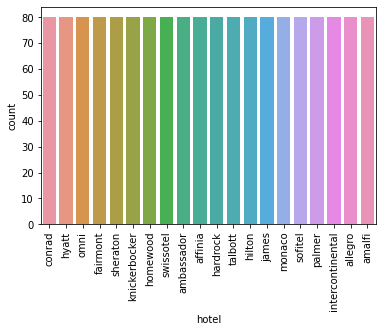

In [9]:
sns.countplot(data = df, x = df['hotel'])
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='polarity', ylabel='count'>

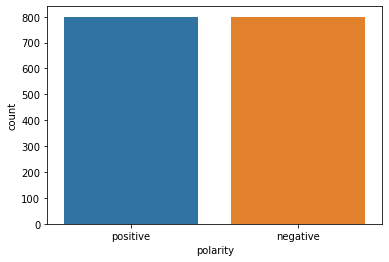

In [10]:
sns.countplot(data =df, x = 'polarity')

In [11]:
df =df.rename(columns = {'deceptive':'review'})

In [12]:
df.head()

,review,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


<AxesSubplot:xlabel='review', ylabel='count'>

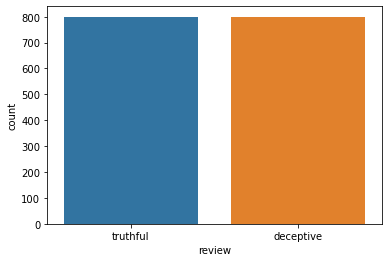

In [13]:
sns.countplot(data =df, x = 'review')

## Data Preprocessing

In [14]:
data = df[['review','polarity','text']]

In [15]:
X = data['text']
y = data['polarity']
y1 = data['review']

In [16]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
tfidf = TfidfVectorizer(stop_words = 'english')

tfidf.fit(X_train_p)

X_train_tfidf_p=tfidf.transform(X_train_p)

X_test_tfidf_p=tfidf.transform(X_test_p)

## Creating Different models ( Naive Bayes, Logistic,SVC and MLPClassifier)

In [18]:
nb_polarity = MultinomialNB()
nb_polarity.fit(X_train_tfidf_p,y_train_p)

MultinomialNB()

In [19]:
log_model_polarity = LogisticRegression(max_iter = 1000)
log_model_polarity.fit(X_train_tfidf_p,y_train_p)

LogisticRegression(max_iter=1000)

In [20]:
rbf_svc_polarity = SVC()
rbf_svc_polarity.fit(X_train_tfidf_p,y_train_p)

SVC()

In [21]:
linear_svc_polarity = LinearSVC()
linear_svc_polarity.fit(X_train_tfidf_p,y_train_p)

LinearSVC()

In [22]:
mlp_polarity = MLPClassifier()
mlp_polarity.fit(X_train_tfidf_p,y_train_p)

MLPClassifier()

## Report Function to analyse performance of different models

In [23]:
def report_polarity(model):
    preds = model.predict(X_test_tfidf_p)
    print(classification_report(y_test_p,preds))
    plot_confusion_matrix(model,X_test_tfidf_p,y_test_p)

              precision    recall  f1-score   support

    negative       0.97      0.92      0.95       240
    positive       0.92      0.97      0.95       240

    accuracy                           0.95       480
   macro avg       0.95      0.95      0.95       480
weighted avg       0.95      0.95      0.95       480



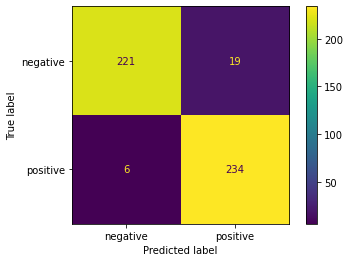

In [24]:
report_polarity(nb_polarity)

              precision    recall  f1-score   support

    negative       0.94      0.95      0.95       240
    positive       0.95      0.94      0.95       240

    accuracy                           0.95       480
   macro avg       0.95      0.95      0.95       480
weighted avg       0.95      0.95      0.95       480



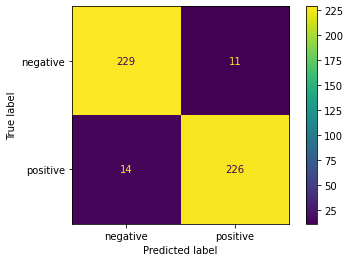

In [25]:
report_polarity(log_model_polarity)

              precision    recall  f1-score   support

    negative       0.94      0.96      0.95       240
    positive       0.96      0.94      0.95       240

    accuracy                           0.95       480
   macro avg       0.95      0.95      0.95       480
weighted avg       0.95      0.95      0.95       480



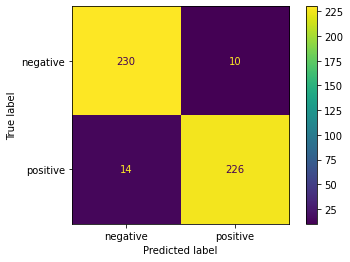

In [26]:
report_polarity(rbf_svc_polarity)

              precision    recall  f1-score   support

    negative       0.94      0.95      0.95       240
    positive       0.95      0.94      0.95       240

    accuracy                           0.95       480
   macro avg       0.95      0.95      0.95       480
weighted avg       0.95      0.95      0.95       480



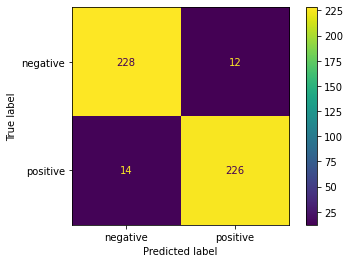

In [27]:
report_polarity(linear_svc_polarity)

              precision    recall  f1-score   support

    negative       0.95      0.95      0.95       240
    positive       0.95      0.95      0.95       240

    accuracy                           0.95       480
   macro avg       0.95      0.95      0.95       480
weighted avg       0.95      0.95      0.95       480



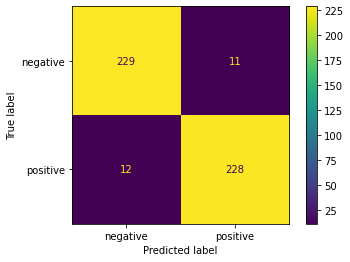

In [28]:
report_polarity(mlp_polarity)

## Naive Bayes model Finalized on the basis of report

In [30]:
Polarity_nb_Pipe = Pipeline([('tfidf',TfidfVectorizer()),('nb_polarity',MultinomialNB())])

In [31]:
Polarity_nb_Pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb_polarity', MultinomialNB())])

In [32]:
X

0       We stayed for a one night getaway with family ...
1       Triple A rate with upgrade to view room was le...
2       This comes a little late as I'm finally catchi...
3       The Omni Chicago really delivers on all fronts...
4       I asked for a high floor away from the elevato...
                              ...                        
1595    Problems started when I booked the InterContin...
1596    The Amalfi Hotel has a beautiful website and i...
1597    The Intercontinental Chicago Magnificent Mile ...
1598    The Palmer House Hilton, while it looks good i...
1599    As a former Chicagoan, I'm appalled at the Ama...
Name: text, Length: 1600, dtype: object

## Saving and Loading the model

In [33]:
joblib.dump(Polarity_nb_Pipe,'Polarity_np_model.pkl')

['Polarity_np_model.pkl']

In [7]:
loaded_model = joblib.load('Polarity_np_model.pkl')

## Predicting polarity of the input reviews

In [12]:
loaded_model.predict([' i never seen in hyderabad, he take 150 rs per chicken biryani, just, gives 1 bowl rice and one leg peace, i asked tom what is this quantity of rice, he said, this is not ur house side hotel, we just give this quantity only'])

array(['negative'], dtype='<U8')

In [8]:
loaded_model.predict(['good hotel'])

array(['positive'], dtype='<U8')

In [9]:
loaded_model.predict(['bad hotel'])

array(['negative'], dtype='<U8')

In [9]:
loaded_model.predict(['had an amazing stay, will visit again '])

array(['positive'], dtype='<U8')

In [38]:
loaded_model.predict(['Worst experience in a hotel.Will never visit again'])

array(['negative'], dtype='<U8')

# FAKE REVIEW DETECTION

In [39]:
y1 = data['review']

## Train test split again 

In [40]:
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X, y1, test_size=0.25, random_state=101)

In [41]:
tfidf_rev = TfidfVectorizer(stop_words = 'english')
tfidf_rev.fit(X_train_rev)
X_train_rev_tfidf=tfidf_rev.transform(X_train_rev)
X_test_rev_tfidf=tfidf_rev.transform(X_test_rev)

## Creating Different Models

In [42]:
nb_review = MultinomialNB()
nb_review.fit(X_train_rev_tfidf,y_train_rev)

MultinomialNB()

In [43]:
log_model_rev = LogisticRegression(max_iter = 1000)
log_model_rev.fit(X_train_rev_tfidf,y_train_rev)

LogisticRegression(max_iter=1000)

In [44]:
mlp_review = MLPClassifier()
mlp_review.fit(X_train_rev_tfidf,y_train_rev)

MLPClassifier()

## Report function for reviews

In [45]:
def report_review(model):
    preds = model.predict(X_test_rev_tfidf)
    print(classification_report(y_test_rev,preds))
    plot_confusion_matrix(model,X_test_rev_tfidf,y_test_rev)

              precision    recall  f1-score   support

   deceptive       0.78      0.93      0.85       193
    truthful       0.92      0.75      0.83       207

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



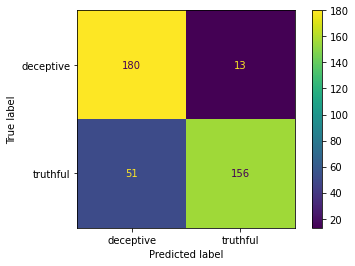

In [46]:
report_review(nb_review)

              precision    recall  f1-score   support

   deceptive       0.87      0.87      0.87       193
    truthful       0.88      0.88      0.88       207

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



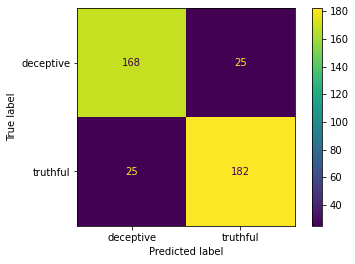

In [47]:
report_review(mlp_review)

## Finalizing Model

In [48]:
review_mlp_pipe = Pipeline([('tfidf',TfidfVectorizer()),('mlp_review',MLPClassifier())])
review_mlp_pipe.fit(X,y1)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mlp_review', MLPClassifier())])

# Saving Review Detection model

In [49]:
joblib.dump(review_mlp_pipe,'Review_mlp_model.pkl')

['Review_mlp_model.pkl']

In [13]:
loaded_model_rev = joblib.load('Review_mlp_model.pkl')

## Predicting review whether fake or not

In [14]:
loaded_model_rev.predict(['I received the type of room that I had reserved. Cleanliness seems to be an issue with the maid staff. The carpet had debris and the bathroom needed attention. Room service was adequate but not great. The walls seem to be paper then as I heard one neighbor\'s TV for most of the night and the other neighbor\'s late enjoyment.'])

array(['deceptive'], dtype='<U9')

In [ ]:
This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007

In [15]:
loaded_model_rev.predict(["This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007"])

array(['truthful'], dtype='<U9')